In [1]:
import numpy as np
from scipy import integrate as intg 
from scipy import optimize as opt
from matplotlib import pyplot as plt 
import time 
import BQPDynamics as bqp
import Eilenberger as eil

plt.rcParams['font.size']=14
plt.rcParams['text.usetex']=True

In [2]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100

fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

ntemps = 11
temps = np.linspace(0.9,1.05,ntemps)

gaps = np.zeros((ntemps))
times = np.zeros_like(gaps)

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
print(sim.zero/sim.Tc)
sim.verbose = True
sim.set_gamma_imp(0.1)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
grs = []

for i in range(ntemps):
    print(str(i))
    sim.set_temperature(temps[i])
    t0 = time.time()
    if i > 0:
        gr, gap = sim.calc_eq(grs[i-1],gaps[i-1])
        grs.append(gr)
        gaps[i] = np.abs(gap)
    else:
        gr,gap = sim.calc_eq()
        grs.append(gr)
        gaps[i] = np.abs(gap)
    t1 = time.time()
    times[i] = t1-t0


0.03527753977724091
0
A solution was found at the specified tolerance.
1
A solution was found at the specified tolerance.
2
A solution was found at the specified tolerance.
3
A solution was found at the specified tolerance.
4


KeyboardInterrupt: 

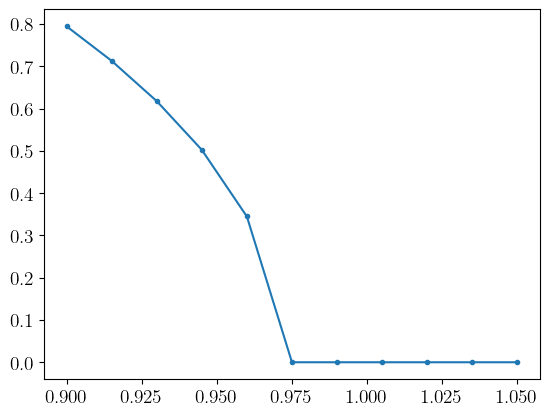

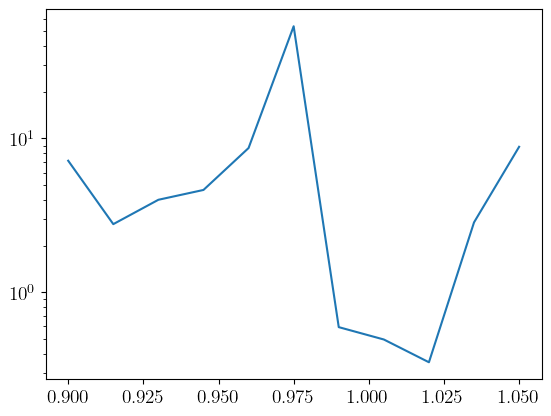

In [3]:
plt.plot(temps,gaps[:],marker='.')
plt.show()
plt.plot(temps,times[:])
plt.yscale('log')
plt.show()

In [2]:
Tc = 1.

ntheta = 50
cutoff = 10.*eil.BCS_ratio*Tc
nw = 100
fine_nw = 200
fine_cutoff = 1.*eil.BCS_ratio*Tc

sim = eil.Eilenberger(nw,ntheta,cutoff,fine_grid=(fine_nw,fine_cutoff))
sim.verbose = True
sim.set_gamma_imp(0.3)
sim.set_Dynes_eta(0.03)
sim.set_Tc(1.)
sim.set_BCS_coupling(sim.calc_BCS_coupling() )
sim.set_temperature(0.1*Tc)
timers = np.zeros((nDelta,nQ))

nDelta = 10
nQ = 5
t0 = time.time()
sim.precompute_hr(nDelta,nQ)
t1 = time.time()
print(f"{sim.nDelta} x {sim.nQ} grid precomputation of hR: {t1-t0:0.2f}s")

NameError: name 'nDelta' is not defined

In [4]:
sim._calc_gr(0.,0.)

The maximum number of iterations allowed has been reached.


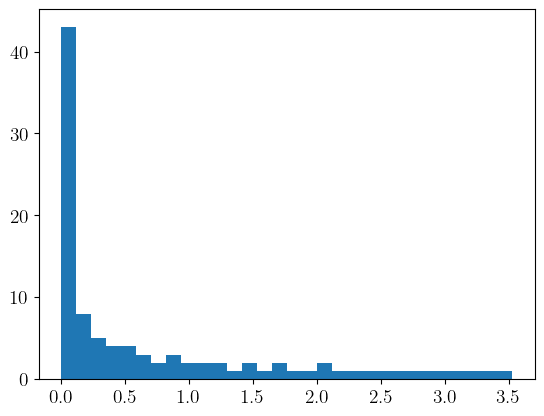

In [19]:
plt.hist(np.abs(sim.Deltas),30)
plt.show()

In [9]:
sim.sigma_r_grid.shape

(2, 2, 301, 50, 100, 50)

In [15]:
print(sim.sigma_r_grid[...,0,0].nbytes/1e6)

0.9632


In [20]:
sim.calc_eq_gap(1.)

AttributeError: 'Eilenberger' object has no attribute 'calc_eq_gap'